In [71]:
from typing_extensions import TypedDict
from typing import Literal

class TypeDictState(TypedDict):
    name: str
    subject: Literal['ai', 'cs']

In [72]:
def study(state: TypeDictState) -> str:
    print("!!!!!!! Study node is called !!!!!!!")
    return {"name": f"{state['name']} wants to study "}

def ai(state: TypeDictState) -> str:
    print("!!!!!!! AI node is called !!!!!!!")
    return {"name": f"{state['name']}  ai", "subject": "ai"}

def cs(state: TypeDictState) -> str:
    print("!!!!!!! CS node is called !!!!!!!")
    return {"name": f"{state['name']}  cs", "subject": "cs"}    

In [73]:
import random
def choose_subject(state:TypeDictState) -> Literal['ai', 'cs']:
    if random.random() < 0.5:
        return "ai"
    else:
        return "cs"

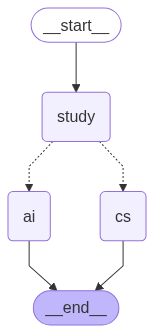

In [74]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(TypeDictState)
builder.add_node("study", study)
builder.add_node("ai", ai)
builder.add_node("cs", cs)

builder.add_edge(START, "study")
builder.add_conditional_edges( "study", choose_subject)
builder.add_edge("ai", END)
builder.add_edge("cs", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [75]:
graph.invoke({"name": "TJ"})

!!!!!!! Study node is called !!!!!!!
!!!!!!! CS node is called !!!!!!!


{'name': 'TJ wants to study   cs', 'subject': 'cs'}

In [83]:
graph.invoke({"name": "TJ"})

!!!!!!! Study node is called !!!!!!!
!!!!!!! AI node is called !!!!!!!


{'name': 'TJ wants to study   ai', 'subject': 'ai'}

## DataClasses

In [ ]:
from dataclasses import dataclass
from typing import Literal


@dataclass
class DataClassState:
    name:str
    subject: Literal['ai', 'cs']

In [4]:
def study(state: DataClassState) -> str:
    print("!!!!!!! Study node is called !!!!!!!")
    return {"name": f"{state.name} wants to study "}

def ai(state: DataClassState) -> str:
    print("!!!!!!! AI node is called !!!!!!!")
    return {"name": f"{state.name}  ai", "subject": "ai"}

def cs(state: DataClassState) -> str:
    print("!!!!!!! CS node is called !!!!!!!")
    return {"name": f"{state.name}  cs", "subject": "cs"}  

In [5]:
import random
def choose_subject(state:DataClassState) -> Literal['ai', 'cs']:
    if random.random() < 0.5:
        return "ai"
    else:
        return "cs"

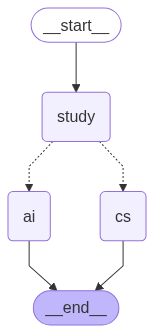

In [7]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(DataClassState)
builder.add_node("study", study)
builder.add_node("ai", ai)
builder.add_node("cs", cs)

builder.add_edge(START, "study")
builder.add_conditional_edges( "study", choose_subject)
builder.add_edge("ai", END)
builder.add_edge("cs", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
graph.invoke(DataClassState(name="TJ", subject="ai"))

!!!!!!! Study node is called !!!!!!!
!!!!!!! CS node is called !!!!!!!


{'name': 'TJ wants to study   cs', 'subject': 'cs'}

The output is decided by the randomness of the choose_subject function

In [11]:
graph.invoke(DataClassState(name="TJ", subject="cs"))

!!!!!!! Study node is called !!!!!!!
!!!!!!! AI node is called !!!!!!!


{'name': 'TJ wants to study   ai', 'subject': 'ai'}